In [12]:
!pip install transformers


# **Data Collection:**
Use the provided sample dataset for account and billing data or can use any synthetic dataset or dataset from sources like Kaggle.

Ensure the data is clean and standardized. *italicized text* italicized text


In [13]:
import pandas as pd
import openai
import matplotlib.pyplot as plt
import seaborn as sns

data_path = 'data.csv'
df = pd.read_csv(data_path)

print(df.head())

print(df.info())


   Account ID  Customer Name Billing Date      Amount   Status   Description  \
0        1001   David Wilson   2023-01-01  193.987558  Pending  Consultation   
1        1002  Alice Johnson   2023-01-02  370.656021  Pending      Purchase   
2        1003  Sophia Garcia   2023-01-03  233.019486  Pending      Lab Test   
3        1004   Olivia Davis   2023-01-04  296.120725     Paid     Follow-up   
4        1005   David Wilson   2023-01-05  294.654764     Paid       Therapy   

    Department  
0   Pediatrics  
1  Orthopedics  
2     Pharmacy  
3     Pharmacy  
4          ENT  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Account ID     110 non-null    int64  
 1   Customer Name  110 non-null    object 
 2   Billing Date   110 non-null    object 
 3   Amount         110 non-null    float64
 4   Status         110 non-null    object 
 5   

# **Data Validation:**
Validate the collected data to ensure its accuracy and completeness.

Employ validation techniques to check for missing, incorrect, or inconsistent data entries.


In [14]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

duplicate_entries = df.duplicated().sum()
print("Number of duplicate entries:", duplicate_entries)

print(df.describe(include='all'))

df['Billing Date'] = pd.to_datetime(df['Billing Date'])
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

print(df.info())


Missing values in each column:
 Account ID       0
Customer Name    0
Billing Date     0
Amount           0
Status           0
Description      0
Department       0
dtype: int64
Number of duplicate entries: 0
         Account ID Customer Name Billing Date       Amount Status  \
count    110.000000           110          110   110.000000    110   
unique          NaN            10          100          NaN      4   
top             NaN    Emma Brown   2023-01-28          NaN   Paid   
freq            NaN            16            2          NaN     38   
mean    1048.000000           NaN          NaN   479.309018    NaN   
std       28.809721           NaN          NaN   738.759966    NaN   
min     1001.000000           NaN          NaN    50.581003    NaN   
25%     1023.250000           NaN          NaN   145.411712    NaN   
50%     1045.500000           NaN          NaN   253.709053    NaN   
75%     1072.750000           NaN          NaN   392.219435    NaN   
max     1100.000000  

# **Billing Analysis:**
Analyze the billing data to ensure accuracy and timeliness.
Identify any discrepancies or unusual patterns.

You can assume and utilize relevant metrics to analyze the billing data, such as billing cycle times, payment discrepancies, late payment occurrences, and average payment amounts.


In [15]:
billing_cycle_times = df['Billing Date'].diff().mean()
average_payment_amount = df['Amount'].mean()
late_payment_occurrences = df[df['Status'] == 'Late'].shape[0]
payment_discrepancies = df[df.duplicated(subset=['Account ID', 'Billing Date', 'Amount'], keep=False)]

print("Average billing cycle time:", billing_cycle_times)
print("Average payment amount:", average_payment_amount)
print("Number of late payment occurrences:", late_payment_occurrences)
print("Payment discrepancies:\n", payment_discrepancies)

high_cost_threshold = df['Amount'].quantile(0.95)
high_cost_transactions = df[df['Amount'] > high_cost_threshold]
print("High-cost transactions:\n", high_cost_transactions)




Average billing cycle time: 0 days 06:23:07.155963302
Average payment amount: 479.3090181019999
Number of late payment occurrences: 0
Payment discrepancies:
 Empty DataFrame
Columns: [Account ID, Customer Name, Billing Date, Amount, Status, Description, Department]
Index: []
High-cost transactions:
     Account ID Customer Name Billing Date       Amount   Status Description  \
6         1007     Chris Lee   2023-01-07  2864.738488  Pending    Lab Test   
16        1017      John Doe   2023-01-17  2748.478753  Pending      Refund   
31        1032  David Wilson   2023-02-01  2812.330089  Pending   Procedure   
84        1085  Olivia Davis   2023-03-26  3006.661392     Paid   Emergency   
86        1087    Emma Brown   2023-03-28  3849.771331  Pending  Medication   
93        1094    Jane Smith   2023-04-04  3593.752963  Pending    Purchase   

          Department  
6   General Practice  
16               ENT  
31          Oncology  
84               ENT  
86           Unknown  
93     

## **Visualize the analysis results**

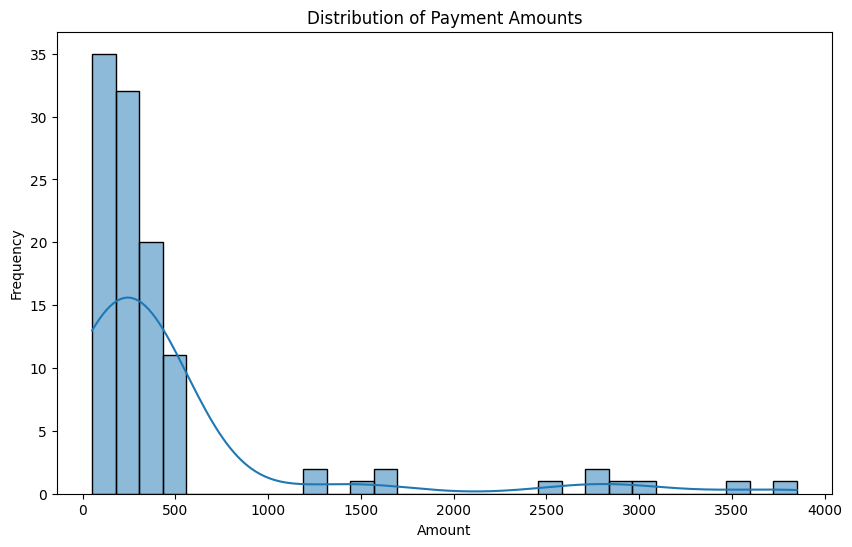

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Distribution of Payment Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

## **Scatter plot of billing dates vs amounts**

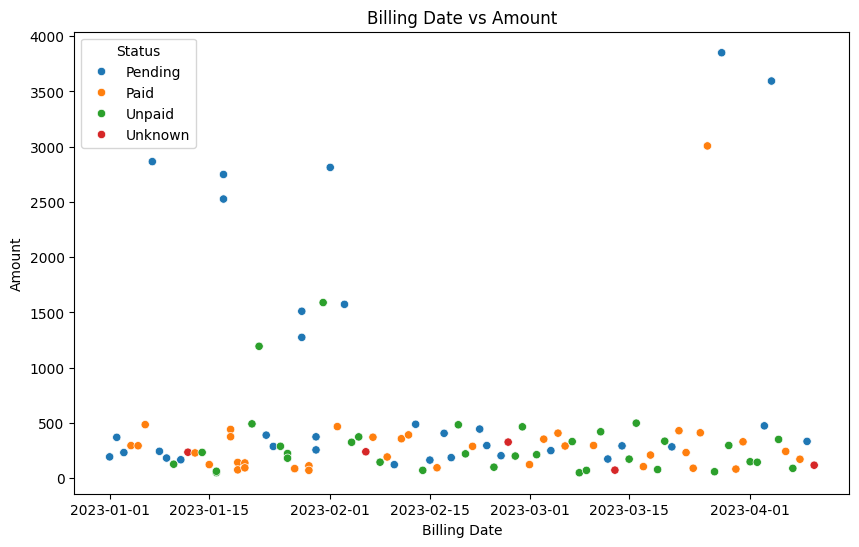

In [17]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Billing Date', y='Amount', hue='Status')
plt.title('Billing Date vs Amount')
plt.xlabel('Billing Date')
plt.ylabel('Amount')
plt.show()


In [1]:
!pip install openai==0.28


In [9]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.2/164.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 8.0 MB/s eta 0:00:00


# **Report Generation:**
Generate a detailed billing report.

Utilize a Large Language Model (LLM) for analyzing and generating the report.

Include insights and findings from the billing analysis, summarizing the overall accuracy and efficiency of the billing process.

This is a part of the pipeline so it should also be automated.


In [10]:
import google.generativeai as genai
import os
import pandas as pd

genai.configure(api_key='YOUR_API_KEY')
model = genai.GenerativeModel('gemini-1.5-flash')

df = pd.read_csv('data.csv')

total_amount = df['Amount'].sum()
avg_amount = df['Amount'].mean()
status_counts = df['Status'].value_counts()
dept_counts = df['Department'].value_counts()

prompt = f"""
Analyze the following billing data and generate a detailed report:

Total Amount Billed: ${total_amount:.2f}
Average Transaction Amount: ${avg_amount:.2f}
Billing Status Counts:
{status_counts.to_string()}
Department Transaction Counts:
{dept_counts.to_string()}

Please provide insights on the billing process efficiency, accuracy, and any notable patterns or anomalies.
"""

response = model.generate_content(prompt)

report = response.text
with open('billing_report.txt', 'w') as f:
    f.write(report)

print("Report generated and saved as 'billing_report.txt'")

Report generated and saved as 'billing_report.txt'
